In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import warnings
import os
import subprocess

In [114]:
#load the dataset train and test
train = pd.read_csv('C:\\Users\\SIDDHARTH\\.streamlit\\Titanic_train.csv')
test = pd.read_csv('D:\\Titanic_test.csv')

In [36]:
#view data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
#check column names 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [42]:
#numerical features
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
#categorical features
train.describe(include ='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<function matplotlib.pyplot.show(close=None, block=None)>

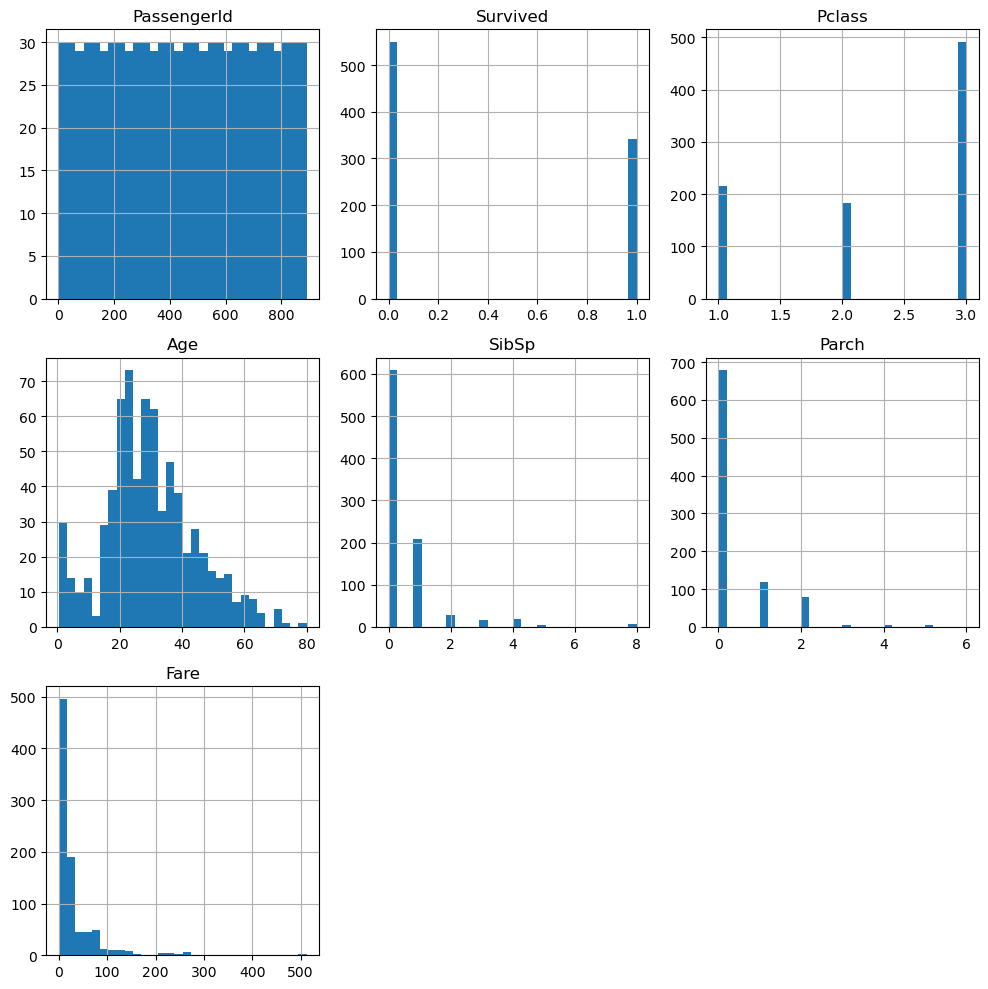

In [46]:
#histogram
train.hist(figsize=(10, 10), bins=30)
plt.tight_layout()
plt.show

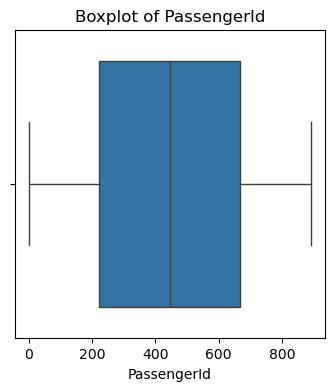

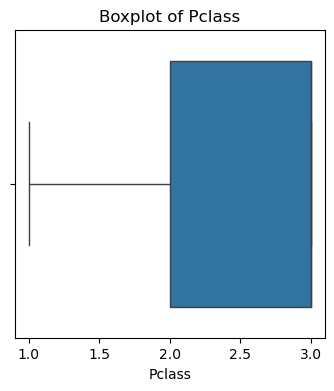

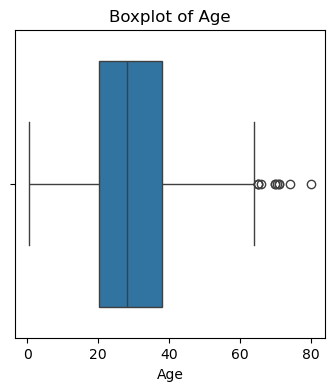

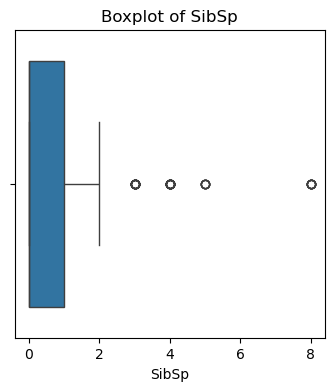

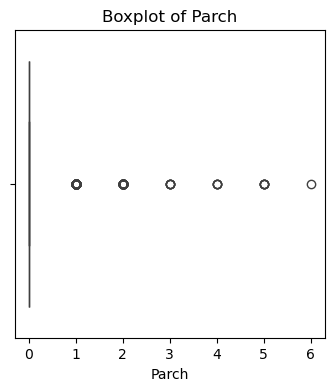

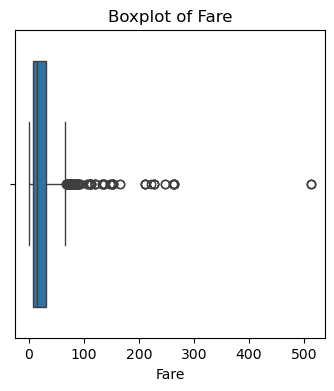

In [47]:
#boxplot
for col in test.select_dtypes(include ='number').columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

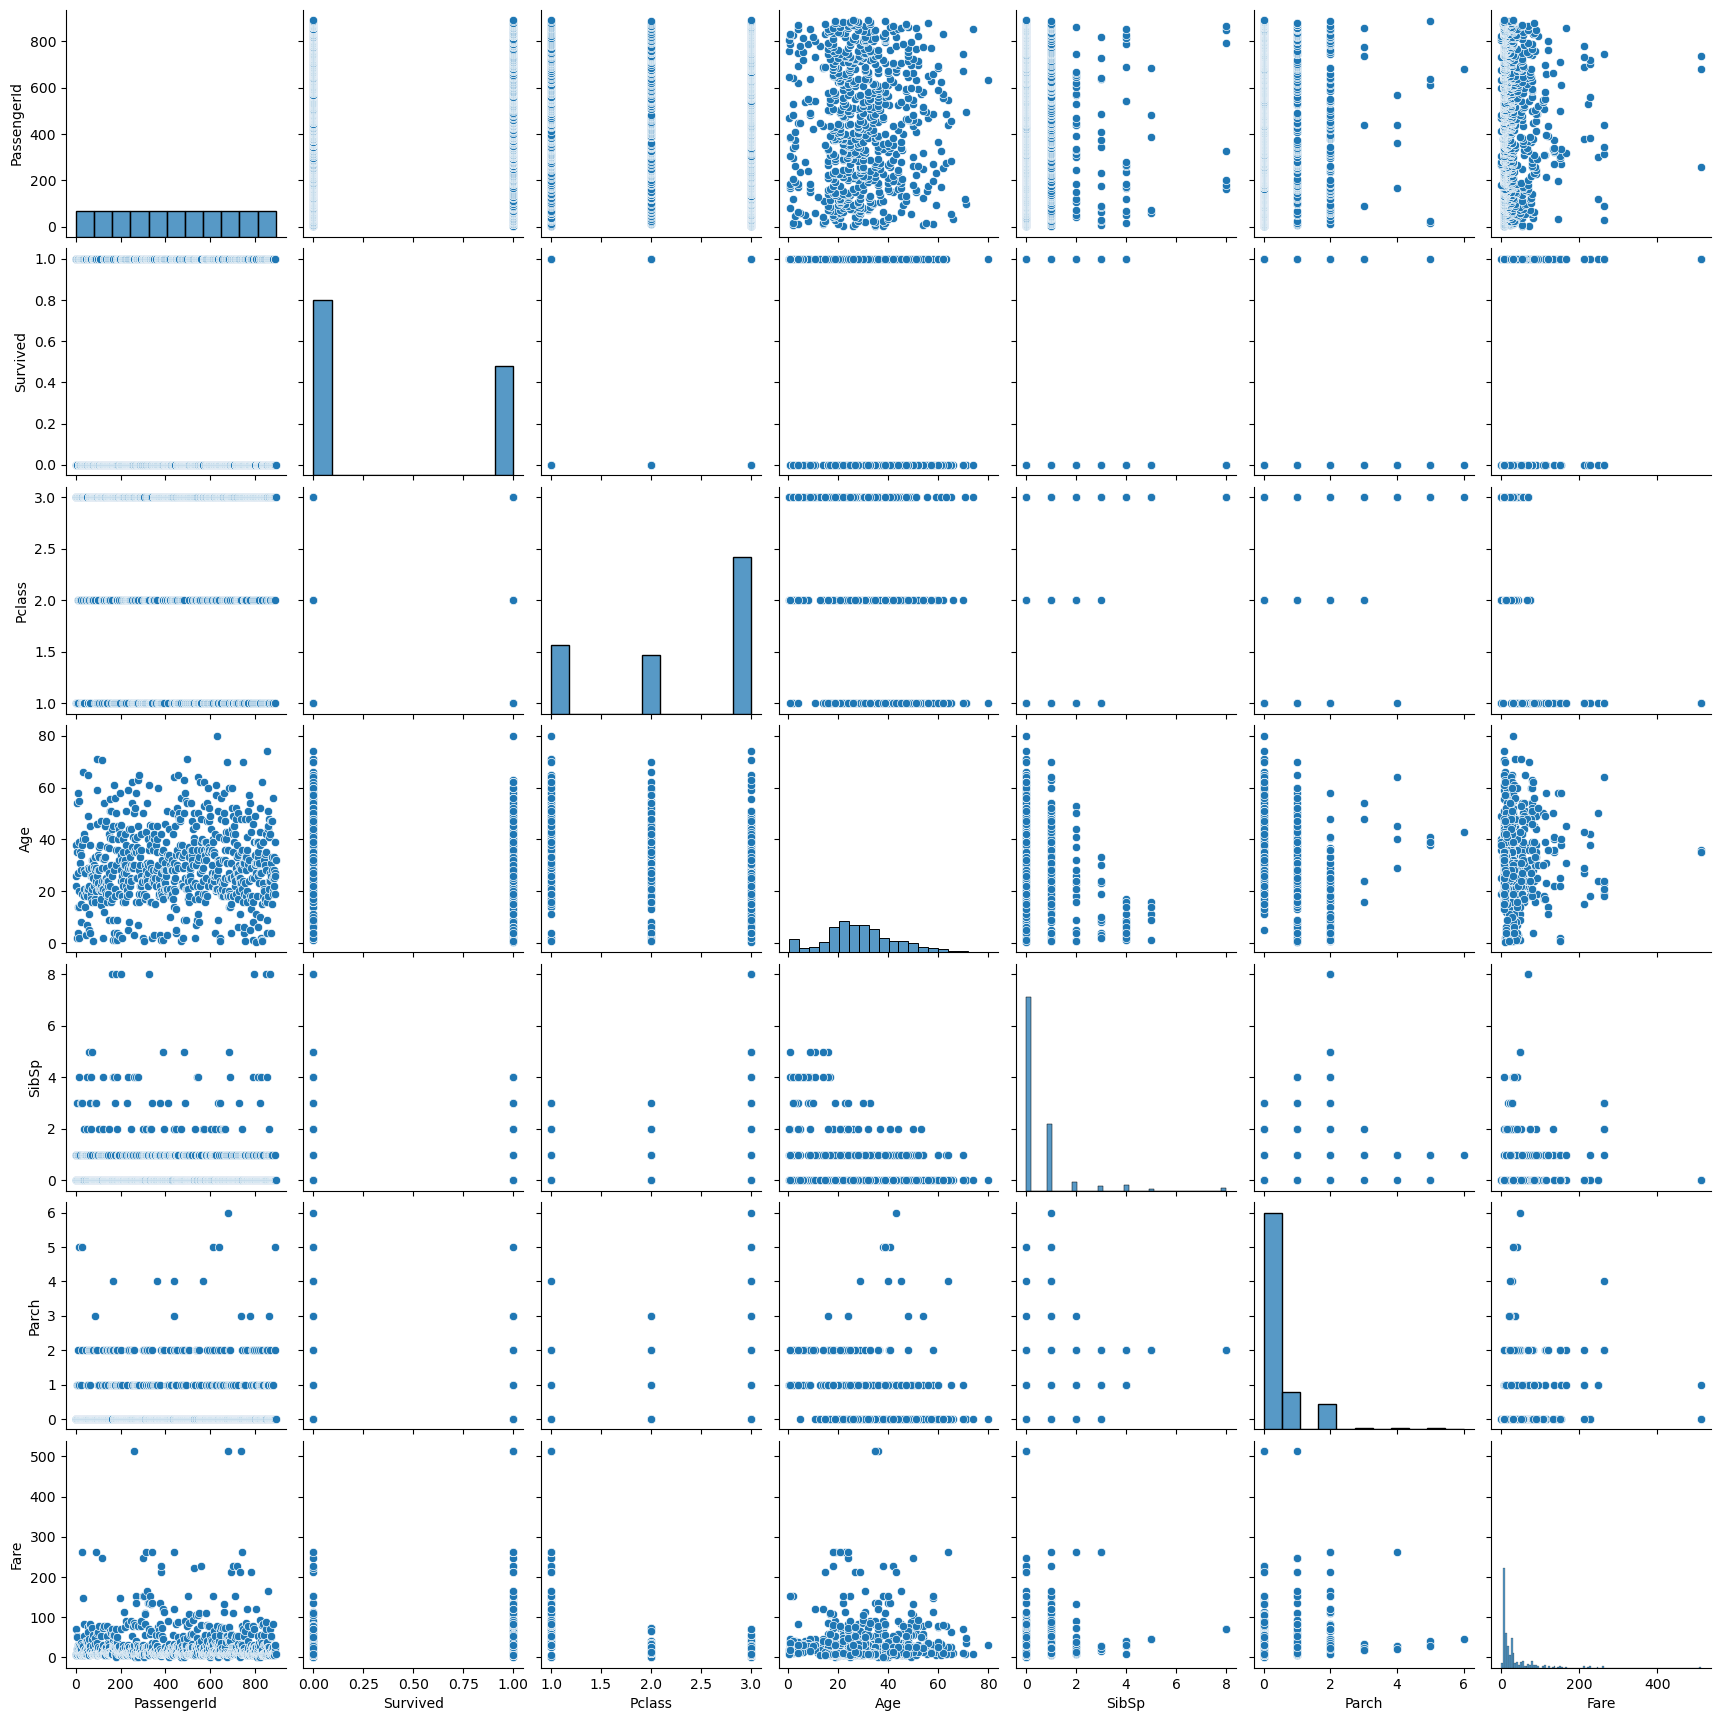

In [48]:
#pairplot
sns.pairplot(train)

In [49]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

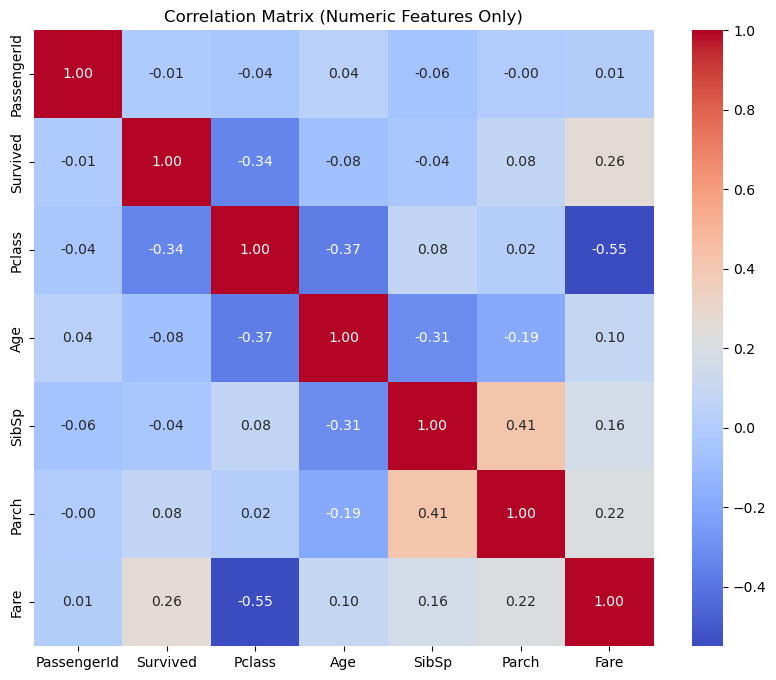

In [50]:
df_numeric = train.select_dtypes(include='number')
df_cleaned = train.drop(columns=['Name', 'Ticket', 'Cabin'])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

In [51]:
#drop unnecessary columns
X = train.drop(['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [52]:
#Encode categorical variables
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])
X['Embarked'] = X['Embarked'].fillna('Missing')
X['Embarked'] = LabelEncoder().fit_transform(X['Embarked'])

In [53]:
#define target
y = train['Survived']

In [54]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,3
3,1,0,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3


In [56]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [57]:
X.shape

(891, 7)

In [58]:
y.shape

(891,)

In [59]:
#split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=25)

In [60]:
Xtrain.shape

(623, 7)

In [61]:
ytrain.shape

(623,)

In [63]:
print(Xtrain.shape, ytrain.shape)

(623, 7) (623,)


In [64]:
print(Xtest.shape, ytest.shape)

(268, 7) (268,)


In [65]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
Xtrain = pd.DataFrame(imputer.fit_transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(imputer.transform(Xtest), columns=X.columns)

In [66]:
#logistic regression 
lr_model = LogisticRegression(random_state=25)

In [67]:
lr_model = LogisticRegression(max_iter=1000, random_state=25)
lr_model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=1000, random_state=25)

Accuracy:  0.7836
Precision: 0.7320
Recall:    0.6893
F1 Score:  0.7100
ROC-AUC:   0.8521


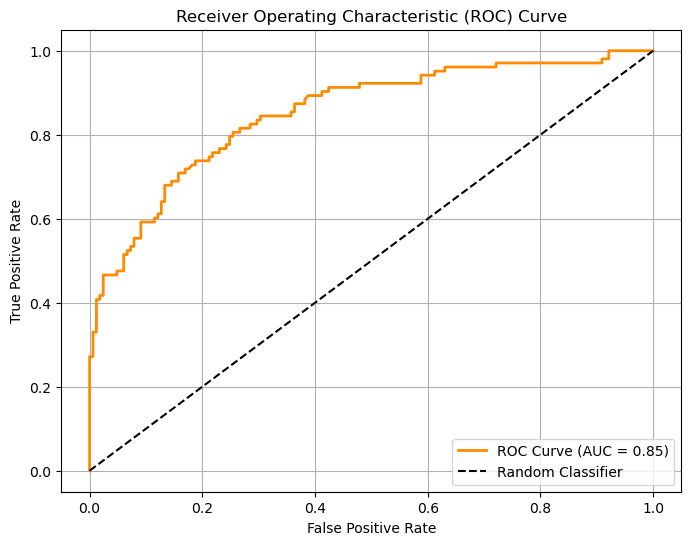

In [68]:
# Predict labels and probabilities
y_pred = lr_model.predict(Xtest)
y_proba = lr_model.predict_proba(Xtest)[:, 1] 

# Evaluation metrics
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)
roc_auc = roc_auc_score(ytest, y_proba)

# Print metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(ytest, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [69]:
!pip install streamlit

In [118]:
# Save the Streamlit app to a Python file
streamlit_code = """
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
titanic_train = pd.read_csv("/content/Titanic_train.csv")

# Preprocess the data (same as in the notebook)
titanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0], inplace=True)
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)

# Initialize LabelEncoders
label_encoder_sex = LabelEncoder()
titanic_train["Sex"] = label_encoder_sex.fit_transform(titanic_train["Sex"])

label_encoder_embarked = LabelEncoder()
titanic_train["Embarked"] = label_encoder_embarked.fit_transform(titanic_train["Embarked"])

# Prepare input data for prediction
X = titanic_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = titanic_train["Survived"]

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Streamlit app
st.title('Titanic Survival Prediction App')
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['Male', 'Female'])
age = st.slider('Age', 1, 100)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 8)
parch = st.slider('Number of Parents/Children Aboard', 0, 6)
fare = st.slider('Fare Paid', 0, 500)
embarked = st.selectbox('Port of Embarkation', ['S', 'C', 'Q'])

# Convert input to the encoded format for the model
input_data = [
    pclass,
    label_encoder_sex.transform([sex.lower()])[0],
    age,
    sibsp,
    parch,
    fare,
    label_encoder_embarked.transform([embarked])[0]
]

if st.button('Predict Survival'):
    prediction = model.predict([input_data])[0]
    probability = model.predict_proba([input_data])[0][1]
    st.write(f"Prediction: {'Survived' if prediction == 1 else 'Did Not Survive'}")
    st.write(f"Probability of Survival: {probability:.2f}")
"""

In [120]:
# Save the Streamlit app code to a Python file
with open("titanic_app.py", "w") as f:
    f.write(streamlit_code)

In [122]:
# Step 6: Run the Streamlit app
def run_streamlit():
    subprocess.Popen(["streamlit", "run", "titanic_app.py"])

run_streamlit()

In [124]:
print("Streamlit app is running. Open the link below in your web browser:")
print("http://localhost:8520")

Streamlit app is running. Open the link below in your web browser:
http://localhost:8520
